![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Non-negative Matrix Factorization (NMF)</center>
### <center> NMF </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/17_Boosting/MainRandomForest1.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#### NMF Objective:
$$\begin{cases}
\min_{\boldsymbol{W},\boldsymbol{H}}\left\Vert \boldsymbol{X}-\boldsymbol{W}\boldsymbol{H}\right\Vert _{F}^{2}\\
\text{s.t. }\boldsymbol{W},\boldsymbol{H}\geq0
\end{cases}$$

<div class="alert alert-block alert-warning">
<span style="color:black">

#### ALS:
In practice, we use least-squares (`lstsq`) to avoid computing the (pseudo) inverse of $\boldsymbol{W}$ and $\boldsymbol{H}$.
1. $\boldsymbol{W}\leftarrow\max\left\{ 0,\boldsymbol{X}\boldsymbol{H}^{\dagger}\right\} $  
2. $\boldsymbol{H}\leftarrow\max\left\{ 0,\boldsymbol{W}^{\dagger}\boldsymbol{X}\right\} $  
</span>
</div>
    
<div class="alert alert-block alert-warning">
<span style="color:black">

#### Coordinate descent:
1. $\boldsymbol{W}\leftarrow\max\left\{ 0,\boldsymbol{W}+\mu\left(\boldsymbol{X}-\boldsymbol{W}\boldsymbol{H}\right)\boldsymbol{H}^{T}\right\} $
2. $\boldsymbol{H}\leftarrow\max\left\{ 0,\boldsymbol{H}+\mu\boldsymbol{W}^{T}\left(\boldsymbol{X}-\boldsymbol{W}\boldsymbol{H}\right)\right\} $
</span>
</div>
    
<div class="alert alert-block alert-warning">
<span style="color:black">

#### Multiplicative update (fixed-point):
1. $W_{ij}\leftarrow W_{ij}\frac{\left(\boldsymbol{X}\boldsymbol{H}^{T}\right)_{ij}}{\left(\boldsymbol{W}\boldsymbol{H}\boldsymbol{H}^{T}\right)_{ij}}$
2. $H_{ij}\leftarrow H_{ij}\frac{\left(\boldsymbol{W}^{T}\boldsymbol{X}\right)_{ij}}{\left(\boldsymbol{W}^{T}\boldsymbol{W}\boldsymbol{H}\right)_{ij}}$
</span>
</div>

### Exercise:
Complete the **coordinate descent** and **fixed-point** implementation.

In [2]:
import time
from numpy.linalg import norm, lstsq

def NMF(mX, mW, mH, numIter=100, algorithm='ALS', µ=4e-4):
    
    #-- Swap Python dimensions:
    mX      = mX.T #-- D x N
    #-- Residual:
    mR      = mX - mW @ mH
    vT      = np.full(numIter, np.nan)
    vErr    = np.full(numIter, np.nan)
    vErr[0] = norm(mR, ord='fro')
    vT  [0] = time.time()
    for ii in range(1, numIter):
        if algorithm == 'ALS':
            mW = np.maximum(0, lstsq(mH.T, mX.T, rcond=None)[0]).T
            mH = np.maximum(0, lstsq(mW,   mX,   rcond=None)[0])
      
        if algorithm == 'CD':
            mW = ???
            mH = ???
       
        if algorithm == 'Mult':
            mW = ???
            mH = ???
            
        mR       = mX - mW @ mH
        vErr[ii] = norm(mR, ord='fro')
        vT  [ii] = time.time()
            
    return mW.T, mH.T, vErr, vT - vT[0]

#### Load MNIST data
(Only digits 0, 1, 2, and 3)

In [3]:
from sklearn.datasets import fetch_openml

N      = 10000
mX, vY = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
vY     = np.int32(vY)

vIdx   = np.isin(vY, [0,1,2,3])
mX     = mX[vIdx,:]
vY     = vY[vIdx]
mX     = mX[:N,:] / 255
vY     = vY[:N]

mX.shape, vY.shape

((10000, 784), (10000,))

#### Apply NMF with random initialization:

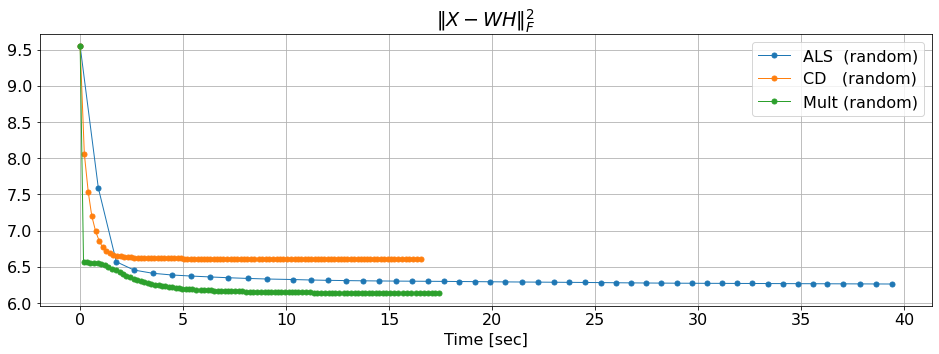

In [4]:
N, D = mX.shape
d    = 20
mW0  = np.random.rand(D, d)
mH0  = np.random.rand(d, N)

lAlg = ['ALS', 'CD', 'Mult']
plt.figure(figsize=(16, 5))
for alg in lAlg:
    #-- NMF:
    numIter             = 100 if alg != 'ALS' else 50
    mW, mH, vErr, vTime = NMF(mX, mW0, mH0, algorithm=alg, numIter=numIter, µ=2e-5)
    #-- Plot:
    plt.plot(vTime, np.log(vErr), lw=1, marker='.', ms=10, label=f'{alg:4} (random)')

plt.xlabel('Time [sec]')
plt.title (r'$\left\Vert X-WH\right\Vert _{F}^{2}$')
plt.legend()
plt.grid  ()
plt.show  ()

#### Apply NMF with SVD initialization:

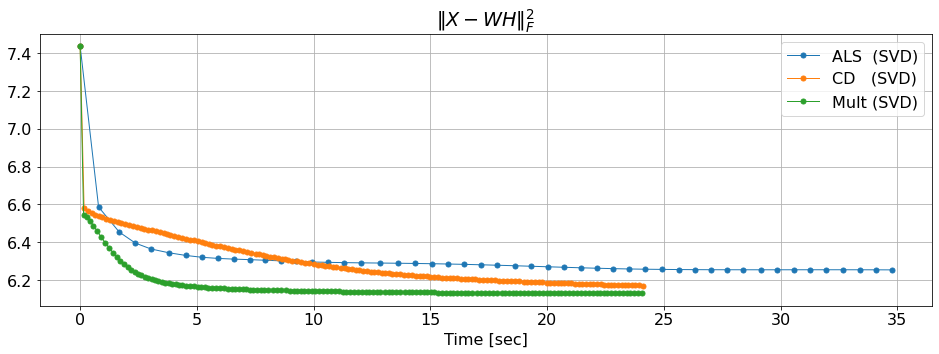

In [5]:
from scipy.sparse.linalg import svds

[mW0, vS, mH0] = svds(mX.T, d)
mW0            = mW0 * np.sqrt(vS[None,:])
mH0            = mH0 * np.sqrt(vS[:,None])
mW0            = np.abs(mW0)
mH0            = np.abs(mH0)

lAlg = ['ALS', 'CD', 'Mult']
plt.figure(figsize=(16, 5))
for alg in lAlg:
    #-- NMF:
    numIter             = 150 if alg != 'ALS' else 50
    mW, mH, vErr, vTime = NMF(mX, mW0, mH0, algorithm=alg, numIter=numIter)
    #-- Plot:
    plt.plot(vTime, np.log(vErr), lw=1, marker='.', ms=10, label=f'{alg:4} (SVD)')

plt.xlabel('Time [sec]')
plt.title (r'$\left\Vert X-WH\right\Vert _{F}^{2}$')
plt.legend()
plt.grid  ()
plt.show  ()

#### Sk-learn NMF:

In [6]:
%%time
from sklearn.decomposition import NMF

#-- Apply NMF:
d    = 10
oNMF = NMF(n_components=d, init='nndsvda', max_iter=500).fit(mX)
mH   = oNMF.transform(mX)
mW   = oNMF.components_

mW.shape, mH.shape

Wall time: 2.85 s


((10, 784), (10000, 10))

In [7]:
#-- Error:
np.log(norm(mX - mH @ mW))

6.238364782115921

#### Plot basis ($\boldsymbol{W}\in\mathbb{R}^{D\times d}$):

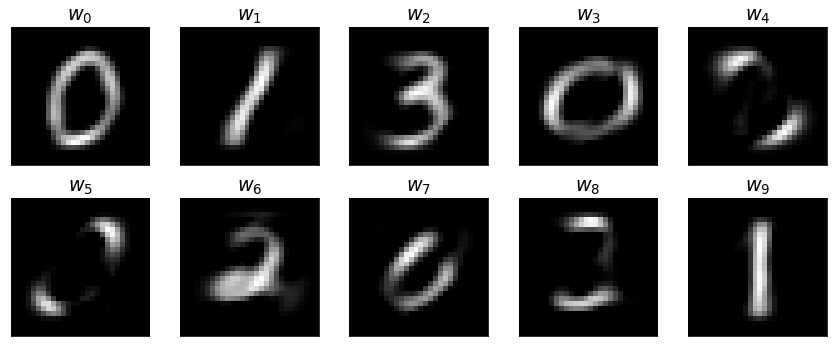

In [8]:
fig, _ = plt.subplots(2, 5, figsize=(12, 5))
for ii, ax in enumerate(fig.axes):
    mI = np.reshape(mW[ii,:], [28, 28])
    ax.matshow   (mI, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title (f'$w_{ii}$')

plt.tight_layout()
plt.show()

#### Plot coefficients ($\boldsymbol{H}\in\mathbb{R}^{d\times N}$):
We sort the samples according to the true (digit) label `vY`

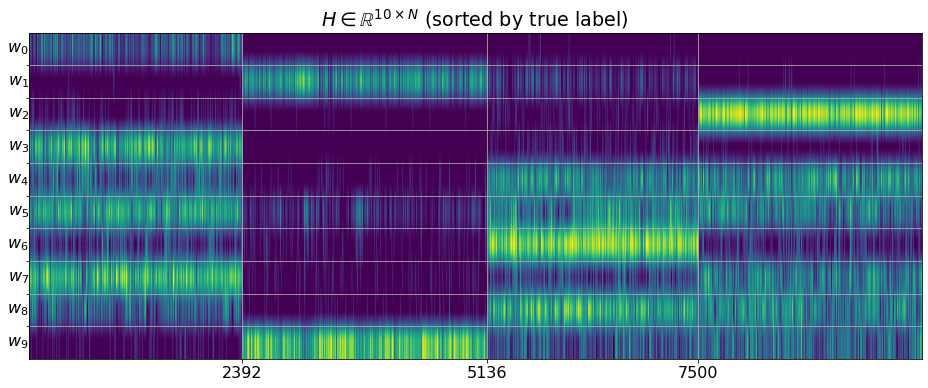

In [9]:
vIdx = np.argsort(vY)

plt.figure(figsize=(16, 6))
plt.imshow(mH[vIdx,:].T > 0.1, aspect='auto')
plt.xticks(np.nonzero(np.diff(vY[vIdx]) == 1)[0])
plt.title (r'$H\in\mathbb{R}^{10\times N}$ (sorted by true label)')
plt.grid  ()
plt.yticks(np.arange(0, 9) + 1/2, labels=[])
[plt.text (0, ii, f'$w_{ii}$', ha='right', va='center') for ii in range(10)]
plt.show  ()